In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [62]:
#df_healthIndicators = pd.read_csv('health-indicators-for-south-africa-2.csv')
df_indicators = pd.read_csv('indicators_zaf.csv', header=0, index_col=2)
#df_educationIndicators = pd.read_csv('education-indicators-for-south-africa-1.csv')
df_quickCharts = pd.read_csv('quickcharts-combined-indicators-for-south-africa-1.csv', index_col=2)

In [63]:
#df_healthIndicators.head()
df_indicators.head()
#df_educationIndicators
#df_quickCharts.head()


,Country Name,Country ISO3,Indicator Name,Indicator Code,Value
Year,,,,,
#date+year,#country+name,#country+code,#indicator+name,#indicator+code,#indicator+value+num
2004,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,63200
2003,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,65475
2002,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,67750
2001,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,70025


In [64]:
df_indicators.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1,inplace = True)
df_indicators = df_indicators.drop(index='#date+year')
display(df_indicators.head())
#

,Indicator Name,Value
Year,,
2004,"Agricultural machinery, tractors",63200
2003,"Agricultural machinery, tractors",65475
2002,"Agricultural machinery, tractors",67750
2001,"Agricultural machinery, tractors",70025
2000,"Agricultural machinery, tractors",72300


In [65]:
df_indicators['Value'] = df_indicators['Value'].astype(float)

In [66]:
df_pivot = df_indicators.pivot_table(values='Value', index=df_indicators.index, columns = 'Indicator Name')
display(df_pivot)

Indicator Name,Total fertility rate (TFR) (births per woman): Q1 (lowest),Total fertility rate (TFR) (births per woman): Q2,Total fertility rate (TFR) (births per woman): Q3,Total fertility rate (TFR) (births per woman): Q4,Total fertility rate (TFR) (births per woman): Q5 (highest),5-bank asset concentration,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),...,Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women with a national identity card or equivalent foundational identity document (% of women ages 15+),Women's share of population ages 15+ living with HIV (%),Working capital financed by banks (%),Young people (ages 15-24) newly infected with HIV,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)"
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3.1,2.9,2.7,2.3,2.1,98.8359,1.0,1.0,1.0,1.0,...,0.9,3.6,NaN,64.6,NaN,100000.0,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,98.4736,1.0,1.0,1.0,1.0,...,NaN,NaN,90.78243,64.8,NaN,90000.0,33.01159,464102.0,153207.0,310894.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,65.0,NaN,78000.0,NaN,NaN,NaN,NaN


In [92]:
df_corr = df_pivot.corr()
#df_corr.to_csv('out_corr.csv', index=True)

In [79]:
df_un_GDP = df_pivot[['GDP (current US$)','Unemployment, total (% of total labor force) (modeled ILO estimate)']]
df_un_GDP.reset_index(inplace=True)
df_un_GDP.head()

Indicator Name,Year,GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,1960,7.575397e+09,NaN
1,1961,7.972997e+09,NaN
2,1962,8.497997e+09,NaN
3,1963,9.423396e+09,NaN
4,1964,1.037400e+10,NaN


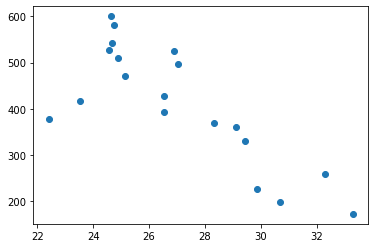

In [95]:
plt.scatter(df_pivot['Unemployment, total (% of total labor force) (national estimate)'],df_pivot['Current health expenditure per capita (current US$)'])
plt.show()

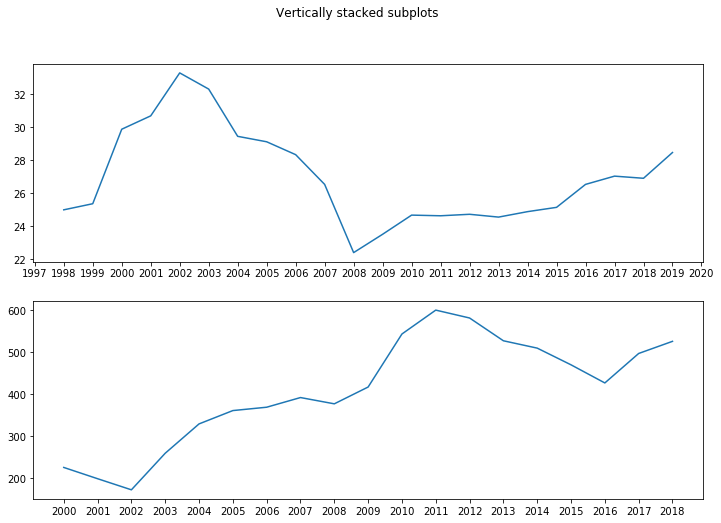

In [94]:
fig, axs = plt.subplots(2,figsize=(12,8))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_un_GDP['Year'],df_pivot['Unemployment, total (% of total labor force) (national estimate)'])
axs[1].plot(df_un_GDP['Year'],df_pivot['Current health expenditure per capita (current US$)'])
plt.show()